<a href="https://colab.research.google.com/github/eunyhwang/TextMining/blob/main/Topic_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests beautifulsoup4
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 46.5 MB/s eta 0:00:00


# Web Crawling: Naver News

In [ ]:
import requests
from bs4 import BeautifulSoup

url = f"https://openapi.naver.com/v1/search/news.json?query={'지속가능성'}&display={100}&start={1}&sort={'date'}"
headers = {
    'X-Naver-Client-Id': '',
    'X-Naver-Client-Secret': ''
}

response = requests.get(url, headers = headers)
#print(response)

soup = BeautifulSoup(response.content, 'html.parser')
title = soup.find('h1').get_text() if soup.find('h1') else 'No Title'
paragraphs = soup.find_all('p')
content = ' '.join([para.get_text() for para in paragraphs])

print({
    'title': title,
    'content': content
})

{'title': 'No Title', 'content': ''}


In [ ]:
### Collecting 1,000 articles with Naver API

import requests
import json
import html # for decoding

client_id = ''
client_secret = ''

def get_news(query, display=100, start=1, sort='date'):
    url = f"https://openapi.naver.com/v1/search/news.json?query={query}&display={display}&start={start}&sort={sort}"
    headers = {
        'X-Naver-Client-Id': client_id,
        'X-Naver-Client-Secret': client_secret
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json()
    else:
        return None

def extract_articles(response):
    articles = []
    if response:
        for item in response.get('items', []):
            title = html.unescape(item.get('title'))
            #print('this is title:',title)
            description = html.unescape(item.get('description')) #for decoding
            description = BeautifulSoup(description, 'html.parser').get_text() #for getting only text
            #print('this is description:',description)
            articles.append({'title': title, 'description': description })
    return articles

query = "지속가능성"
articles = []

for start in range(1, 101, 100):
    response = get_news(query, start=start)
    articles.extend(extract_articles(response))

with open('articles.json', 'w', encoding='utf-8') as f:
    json.dump(articles, f, ensure_ascii=False, indent=4)

print(f"Total articles collected: {len(articles)}")


Total articles collected: 100


In [ ]:
articles[0]['description']

'LG화학 CSSO 이종구 부사장은 "LG화학은 전지 소재, 친환경 지속가능 소재 등 비즈니스 포트폴리오를 지속가능성에 기반하여 구축할 뿐만 아니라, 사용 에너지까지 친환경 에너지로 전환하여 고객들에게 차별화된... '

In [ ]:
import requests
import csv
from bs4 import BeautifulSoup

def scrape_articles(url):
    articles = []

    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find all <a> tags within the specified class
        article_links = soup.find('ul', class_='news_list ranking')
        ('news_list ranking a[href]')
        print('this is the links:',article_links)
        # Extract the href attribute from each <a> tag
        for link in article_links:
            article_url = link['href']
            print("this is the url:",article_url)
            # Fetch the full content of the article
            article_content = scrape_article_content(article_url)

            # Create a dictionary representing the article and add it to the list
            articles.append({
                'url': article_url,
                'content': article_content
            })

    return articles

def scrape_article_content(article_url):
    # Send a GET request to the article URL
    response = requests.get(article_url)
    if response.status_code == 200:
        # Parse the HTML content
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find and extract the content of the article
        # Specifically target the "cont_body" class
        article_content = soup.find('div', class_='cont_body').text.strip()
       #print(article_content)
        return article_content
    else:
        return None

# URL of the Digital Chosun website
base_url = 'https://digitalchosun.dizzo.com/svc/news/ranking.html'
articles = scrape_articles(base_url)


this is the links: []


## BBC Page article crawling

In [ ]:
import requests
import csv
from bs4 import BeautifulSoup

def scrape_articles(url):
  article_hrefs = []
  response = requests.get(url)
  if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')
    news_lists = soup.find_all('div', class_='promo-text')
    for news_list in news_lists:
      article_links = news_list.find_all('a', href=True)
      for article_link in article_links:
        article_url = article_link['href']
        article_hrefs.append(article_url)

  else:
    print('failed')

  return article_hrefs

def scrape_article_content(article_url):
  response = requests.get(article_url)
  content_text = ''
  if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')
    article_content = soup.find_all('p', class_='bbc-1uhqor3 e17g058b0')
    for article in article_content:
      content_text += article.get_text(separator='\n').strip() + ('\n')

    return content_text.strip()

  else:
    print('failed')


In [ ]:
url = "https://www.bbc.com/korean/topics/cz74kjy812kt"
article_hrefs = scrape_articles(url)

# Scrape content for each article URL and save to CSV
with open('articles.csv', 'w', newline='', encoding='utf-8') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['URL', 'Content'])

    for href in article_hrefs:
        content = scrape_article_content(href)
        if content:
          #print("this is href:",href)
          #print("this is content:", content)
          csv_writer.writerow([href, content])
    print("CSV file saved successfully.")

CSV file saved successfully.


## Load csv file

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('articles.csv')
print(df.head())

                                                URL  \
0  https://www.bbc.com/korean/articles/cp667r0gdd5o   
1  https://www.bbc.com/korean/articles/cld0y0qqdq2o   
2  https://www.bbc.com/korean/articles/cxr3d6e3v3xo   
3  https://www.bbc.com/korean/articles/cl4038rez86o   
4  https://www.bbc.com/korean/articles/cz4xw40952do   

                                             Content  
0  지난 21일 영국 런던에서 출발해 싱가포르로 향하던 싱가포르항공 여객기가 심한 난기...  
1  LP를 많이 소비하는 영국에선 이 분야의 탄소 배출량이 사람 400명의 연간 배출량...  
2  미국 콜로라도에 있는 맥주 회사 ‘뉴 벨지움 브루잉’의 시작은 창업자들이 1988년...  
3  지난 16일(현지시간) 하루 동안 아랍에미리트(UAE) 두바이가 기록적인 강우량을 ...  
4  기후변화 때문에 스키 시즌이 점점 불확실해지고 있다. 그런데 최근 과거 인류의 방식...  


In [ ]:
len(df)

20

## Preprocessing

In [ ]:
pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 53.3 MB/s eta 0:00:00


In [ ]:
from konlpy.tag import Okt
import re

# Initialize Okt tokenizer
okt = Okt()

def preprocess_korean_text(text):
    # Remove special characters and numbers
   # text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize text
    tokens = okt.morphs(text, stem=True)
    return ' '.join(tokens)

# Apply preprocessing to the content column
df['cleaned_content'] = df['Content'].apply(preprocess_korean_text)
print(df['cleaned_content'].head())

0    지난 21일 영국 런던 에서 출발 하다 싱가포르 로 향 하다 싱가포르항공 여객기 가...
1    LP 를 많이 소비 하다 영국 에선 이 분야 의 탄소 배출량 이 사람 400 명의 ...
2    미국 콜로라도 에 있다 맥주 회사 뉴 벨지움 브루잉 의 시작 은 창업 자 들이다 1...
3    지난 16일 현지시간 하루 동안 아랍에미리트 UAE 두바이 가 기록 적 인 강우량 ...
4    기후변화 때문 에 스키 시즌 이 점점 불확실하다 있다 그런데 최근 과거 인류 의 방...
Name: cleaned_content, dtype: object


In [ ]:
print(df).head()

## Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=50)  # Adjust max_features as needed
X = vectorizer.fit_transform(df['cleaned_content'])

print(X.toarray())
#print(vectorizer.get_feature_names_out())
X.shape

[[0.03976724 0.         0.         0.         0.         0.
  0.         0.10255923 0.         0.         0.0310207  0.18814257
  0.05913501 0.         0.         0.0845666  0.         0.04425724
  0.06511394 0.0310207  0.         0.         0.         0.
  0.         0.05913501 0.0310207  0.04191859 0.24189759 0.03255697
  0.16767435 0.03418641 0.         0.         0.         0.06837282
  0.21502008 0.08063253 0.         0.1988362  0.         0.17093205
  0.37628513 0.03592105 0.         0.03976724 0.         0.02818887
  0.75257027 0.0295675 ]
 [0.06691108 0.05219442 0.05752095 0.         0.04460738 0.
  0.02482193 0.01917365 0.02118656 0.04029306 0.         0.09044647
  0.04974933 0.04460738 0.1312934  0.01580989 0.         0.
  0.01825977 0.03479628 0.09586826 0.         0.01825977 0.05219442
  0.         0.11608177 0.05219442 0.04702058 0.19596734 0.01825977
  0.02351029 0.05752095 0.         0.         0.06691108 0.09586826
  0.1356697  0.16581852 0.01825977 0.         0.0235102

(20, 50)

In [ ]:
### Intuitive Explanation of TF-IDF Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

# Example documents
documents = [
    "The sky is blue.",
    "The sun is bright.",
    "The sun in the sky is bright.",
    "We can see the shining sun, the bright sun."
]

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the documents
X = vectorizer.fit_transform(documents)

# Display the TF-IDF matrix
print(X.toarray())

# Display the feature names (words)
print(vectorizer.get_feature_names_out())

[[0.65919112 0.         0.         0.         0.42075315 0.
  0.         0.51971385 0.         0.34399327 0.        ]
 [0.         0.52210862 0.         0.         0.52210862 0.
  0.         0.         0.52210862 0.42685801 0.        ]
 [0.         0.3218464  0.         0.50423458 0.3218464  0.
  0.         0.39754433 0.3218464  0.52626104 0.        ]
 [0.         0.23910199 0.37459947 0.         0.         0.37459947
  0.37459947 0.         0.47820398 0.39096309 0.37459947]]
['blue' 'bright' 'can' 'in' 'is' 'see' 'shining' 'sky' 'sun' 'the' 'we']


## Topic Modeling1: LSA

In [ ]:
from sklearn.decomposition import TruncatedSVD

# Initialize LSA model
n_topics = 10  # Adjust the number of topics as needed
lsa_model = TruncatedSVD(n_components=n_topics, random_state=42)
lsa_topic_matrix = lsa_model.fit_transform(X)

# Display the top words in each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

#no_top_words = 10
#display_topics(lsa_model, vectorizer.get_feature_names_out(), no_top_words)

In [ ]:
result = display_topics(lsa_model, vectorizer.get_feature_names_out(), 10)

Topic 1:
하다 있다 에서 으로 이다 되다 이번 않다 기후 하고
Topic 2:
메탄 배출 에서 되다 나오다 보다 에너지 세계 크다 생산
Topic 3:
올리브 오일 만들다 사용 때문 같다 우리 이라고 있다 메탄
Topic 4:
아마존 우리 이러하다 있다 그리고 보다 때문 같다 되다 하고
Topic 5:
이번 기후 아마존 국가 대한 없다 이다 지역 변화 인하다
Topic 6:
이다 국가 대한 그리고 기업 만들다 우리 기술 기후 세계
Topic 7:
지속 않다 하다 가능성 기업 때문 메탄 사용 아니다 이번
Topic 8:
인하다 국가 에서 으로 많다 보다 아니다 하지만 대한 배출
Topic 9:
기술 만들다 이다 사용 하지만 생산 많다 에너지 에선 으로
Topic 10:
이다 기후 이러하다 세계 영향 그리고 하다 위해 지구 변화
None


### Evaluating the Performance




Number of Features: 50
Topic 0: 에서, 으로, 했다, 있다, 이다, 하는, 이번, 하고, 한다, 기후
Topic 1: 메탄, 배출, 에서, 되는, 보다, 이다, 에너지, 된다, 있다, 세계
Topic 2: 기업, 지속, 있다, 하는, 때문, 하고, 에서, 한다, 이다, 가능성
Topic 3: 올리브, 오일, 했다, 아마존, 에서, 인해, 있다고, 많은, 생산, 연구
Topic 4: 국가, 이다, 이번, 대한, 기후, 올리브, 오일, 사용, 세계, 하는
Topic 5: 아마존, 우리, 국가, 이다, 그리고, 기후, 지구, 대한, 이라고, 세계
Topic 6: 지속, 이번, 지역, 가능성, 기업, 때문, 아마존, 하는, 영향, 변화
Topic 7: 인해, 국가, 에서, 가능성, 대한, 이번, 기업, 으로, 많은, 하지만
Topic 8: 기술, 사용, 있다고, 많은, 인해, 하지만, 에너지, 된다, 으로, 이라고
Topic 9: 한다, 기후, 위해, 인해, 이러한, 따르면, 하기, 으로, 있다고, 변화

Number of Features: 100
Topic 0: 에서, 으로, 했다, 있다, 이다, 하는, 하고, 이번, 있는, 생산
Topic 1: 메탄, 배출, 발전, 에서, 가스, 배출량, 되는, 보다, 그런데, 에너지
Topic 2: 합의, cop, 화석연료, 국가, 연료, 기후, 이번, 이다, 대한, 가스
Topic 3: 지속, 기업, 과정, 회사, 하는, 때문, 하고, 이다, 배출량, 사람
Topic 4: 하이브리드, 전기차, 합의, cop, 국가, 대한, 화석연료, 배출, 연구, 세계
Topic 5: 올리브, 오일, 하이브리드, 전기차, 했다, 합의, cop, 화석연료, 국가, 생산
Topic 6: 기류, 아마존, 가마, 벽돌, 이러한, 발생, 에서, 인해, cop, 우리
Topic 7: 북극곰, 가마, 벽돌, 지속, 하고, 과정, 연구, 기업, 하는, 아마존
Topic 8: 아마존, 가마, 벽돌, 했다, 우리, 이러한, 메탄, 에

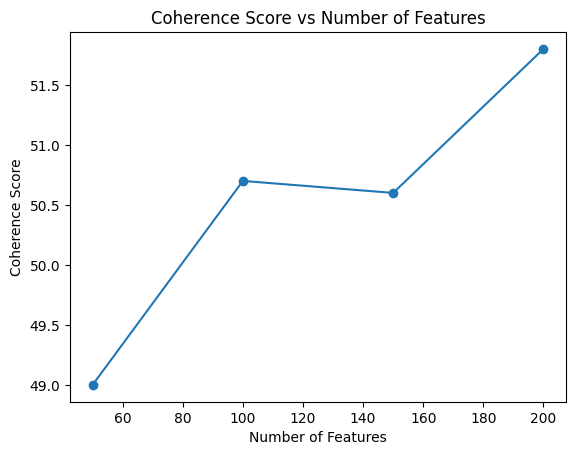

In [ ]:
import pandas as pd
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('articles.csv')

# Preprocess the text
okt = Okt()

def preprocess(text):
    tokens = okt.morphs(text)
    return ' '.join(tokens)

df['processed_content'] = df['Content'].apply(preprocess)

# Experiment with different numbers of features
feature_sizes = [50, 100, 150, 200]
n_topics = 10

def perform_lsa(n_features):
    vectorizer = TfidfVectorizer(max_features=n_features)
    X = vectorizer.fit_transform(df['processed_content'])

    lsa = TruncatedSVD(n_components=n_topics, random_state=42)
    lsa.fit(X)

    terms = vectorizer.get_feature_names_out()
    topics = []
    for i, component in enumerate(lsa.components_):
        terms_in_topic = [terms[i] for i in component.argsort()[:-11:-1]]
        topics.append(f"Topic {i}: {', '.join(terms_in_topic)}")
    return topics

# Store results for each feature size
results = {}
for n_features in feature_sizes:
    topics = perform_lsa(n_features)
    results[n_features] = topics
    print(f"\nNumber of Features: {n_features}")
    for topic in topics:
        print(topic)

# Optionally, visualize the results
# Here we might visualize coherence scores if we compute them, for example
# Assuming `compute_coherence` is a function that computes coherence score for given topics

def compute_coherence(topics):
    # Placeholder function to compute coherence
    # Implement coherence computation here
    return sum(len(topic) for topic in topics) / len(topics)  # Simplistic example

coherence_scores = [compute_coherence(results[n_features]) for n_features in feature_sizes]

plt.plot(feature_sizes, coherence_scores, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Coherence Score')
plt.title('Coherence Score vs Number of Features')
plt.show()


In [ ]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [ ]:
soup = BeautifulSoup.response

In [ ]:
'''
# Save the content of each article into a CSV file
with open('article_contents.csv', 'w', encoding='utf-8', newline='') as csvfile:
    fieldnames = ['link', 'content']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for article in articles:
        if article['content']:
            writer.writerow({'link': article['url'], 'content': article['content']})
'''

In [ ]:
### Get a full content in one channel

import requests
import json
import html
from bs4 import BeautifulSoup

client_id = 'u48m8PJ4OOADnYKmqOaE'
client_secret = '2wsXFZo3bQ'

def get_news(query, display=100, start=1, sort='date'):
    url = f"https://openapi.naver.com/v1/search/news.json?query={query}&display={display}&start={start}&sort={sort}"
    headers = {
        'X-Naver-Client-Id': client_id,
        'X-Naver-Client-Secret': client_secret
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json()
    else:
        return None

def extract_articles(response):
    articles = []
    if response:
        for item in response.get('items', []):
            title = html.unescape(item.get('title'))
            url = item.get('link')  # Extract the URL of the article
            print('this is url:', url)
            content = get_article_content(url)  # Fetch the full content of the article
            articles.append({'title': title, 'content': content})
            #print(f"Title: {title}")
            #print(f"Content: {content}\n")
    return articles

def get_article_content(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        # Extract the text content of the article
        text_content = soup.get_text(separator='\n')
        return text_content
    else:
        return None

query = "지속가능성"
articles = []

for start in range(1, 101, 100):
    response = get_news(query, start=start)
    articles.extend(extract_articles(response))

# Save articles to a JSON file
with open('articles.json', 'w', encoding='utf-8') as f:
    json.dump(articles, f, ensure_ascii=False, indent=4)

print(f"Total articles collected: {len(articles)}")


this is url: https://www.econovill.com/news/articleView.html?idxno=656429
this is url: https://n.news.naver.com/mnews/article/469/0000804445?sid=100
this is url: https://www.nbntv.co.kr/news/articleView.html?idxno=3018263
this is url: http://digitalchosun.dizzo.com/site/data/html_dir/2024/05/31/2024053180221.html
this is url: http://news.lghellovision.net/news/articleView.html?idxno=468837
this is url: https://www.ziksir.com/news/articleView.html?idxno=59505
this is url: https://vop.co.kr/A00001654828.html


SSLError: HTTPSConnectionPool(host='vop.co.kr', port=443): Max retries exceeded with url: /A00001654828.html (Caused by SSLError(SSLError(1, '[SSL: DH_KEY_TOO_SMALL] dh key too small (_ssl.c:1007)')))

In [ ]:
articles[0]

{'title': 'LG화학, 국내 민간기업 최대 규모 풍력 재생에너지 확보',
 'description': 'LG화학 CSSO 이종구 부사장은 "LG화학은 전지 소재, 친환경 지속가능 소재 등 비즈니스 포트폴리오를 지속가능성에 기반하여 구축할 뿐만 아니라, 사용 에너지까지 친환경 에너지로 전환하여 고객들에게 차별화된... '}

In [ ]:
import os
import sys
import urllib.request
import pandas as pd
import json
import re

client_id = 'u48m8PJ4OOADnYKmqOaE'
client_secret = '2wsXFZo3bQ'

query = urllib.parse.quote(input("검색어:"))

idx = 0
display = 100
start = 1
end = 1000

url = "https://openai.naver.com/v1/search/webkr?query=" + query

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret", client_secret)
reponse = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
  response_body = response.read()
  print(response_body.decode("utf-8"))

else:
  print("Error Code:" + rescode)

In [ ]:
import java.io.BufferedReader;
import java.io.IOException;
import java.io.InputStream;
import java.io.InputStreamReader;
import java.net.HttpURLConnection;
import java.net.MalformedURLException;
import java.net.URL;
import java.util.HashMap;
import java.util.Map;

public class ApiExamShortenUrl {

    public static void main(String[] args) {
        String clientId = "YOUR_CLIENT_ID"; //애플리케이션 클라이언트 아이디값"
        String clientSecret = "YOUR_CLIENT_SECRET"; //애플리케이션 클라이언트 시크릿값"

        String originalURL = "https://developers.naver.com/notice";
        String apiURL = "https://openapi.naver.com/v1/util/shorturl?url=" + originalURL;

        Map<String, String> requestHeaders = new HashMap<>();
        requestHeaders.put("X-Naver-Client-Id", clientId);
        requestHeaders.put("X-Naver-Client-Secret", clientSecret);
        String responseBody = get(apiURL,requestHeaders);

        System.out.println(responseBody);
    }

    private static String get(String apiUrl, Map<String, String> requestHeaders){
        HttpURLConnection con = connect(apiUrl);
        try {
            con.setRequestMethod("GET");
            for(Map.Entry<String, String> header :requestHeaders.entrySet()) {
                con.setRequestProperty(header.getKey(), header.getValue());
            }

            int responseCode = con.getResponseCode();
            if (responseCode == HttpURLConnection.HTTP_OK) { // 정상 호출
                return readBody(con.getInputStream());
            } else { // 에러 발생
                return readBody(con.getErrorStream());
            }
        } catch (IOException e) {
            throw new RuntimeException("API 요청과 응답 실패", e);
        } finally {
            con.disconnect();
        }
    }

    private static HttpURLConnection connect(String apiUrl){
        try {
            URL url = new URL(apiUrl);
            return (HttpURLConnection)url.openConnection();
        } catch (MalformedURLException e) {
            throw new RuntimeException("API URL이 잘못되었습니다. : " + apiUrl, e);
        } catch (IOException e) {
            throw new RuntimeException("연결이 실패했습니다. : " + apiUrl, e);
        }
    }

    private static String readBody(InputStream body){
        InputStreamReader streamReader = new InputStreamReader(body);

        try (BufferedReader lineReader = new BufferedReader(streamReader)) {
            StringBuilder responseBody = new StringBuilder();

            String line;
            while ((line = lineReader.readLine()) != null) {
                responseBody.append(line);
            }

            return responseBody.toString();
        } catch (IOException e) {
            throw new RuntimeException("API 응답을 읽는데 실패했습니다.", e);
        }
    }
}

In [ ]:
# version of csv
import requests
from bs4 import BeautifulSoup
import csv

# URL of the webpage
url = "https://www.bbc.com/korean/topics/cz74kjy812kt"

# Send an HTTP request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the webpage
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find all elements with the specified class
    articles = soup.find_all('a', class_='focusIndicatorDisplayBlock bbc-uk8dsi e1d658bg0')

    # Open a CSV file to save the content
    with open("article_links.csv", "w", newline='', encoding="utf-8") as file:
        writer = csv.writer(file)
        # Write the header row
        writer.writerow(["Title", "Link"])

        # Loop through each article element and extract the text and href
        for article in articles:
            title = article.get_text(strip=True)
            link = f"https://www.bbc.com{article['href']}"
            # Write the title and link to the CSV file
            writer.writerow([title, link])

    print("Article links and titles saved to article_links.csv")
else:
    print("Failed to retrieve the webpage")

Article links and titles saved to article_links.csv


## Topic Modeling: LDA

In [ ]:
import pandas as pd
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load the CSV file
data = pd.read_csv('articles.csv')

# Initialize the Okt tokenizer
okt = Okt()

# Define a list of Korean stopwords
stopwords = ['하다', '했다', '한다', '하는', '이다', '있다', '하지만', '그래서', '라며', '이러한',  '대해', '라고', '은', '는', '이', '가', '도', '를', '에', '의', '와', '한', '로', '들', '으로', '하고', '에서', '까지', '에게', '것', '수', '있는', '그', '그녀', '저', '할', '를', '이', '과', '또한', '그리고']

# Preprocessing function
def preprocess(text):
    tokens = okt.morphs(text)  # Tokenize
    tokens = [word for word in tokens if word not in stopwords]  # Remove stopwords
    return ' '.join(tokens)

# Apply preprocessing to the content column
data['content_preprocessed'] = data['Content'].apply(preprocess)

# Vectorize the preprocessed content
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['content_preprocessed'])

# Fit the LDA model
n_topics = 10  # Adjust the number of topics as needed
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_topic_matrix = lda_model.fit_transform(X)

# Display topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

feature_names = vectorizer.get_feature_names_out()
display_topics(lda_model, feature_names, no_top_words=10)


Topic 1:
기류 강우 인공 강우량 공기 기후 기상 지역 홍수 이번
Topic 2:
합의 연료 화석 에너지 이번 대한 전환 표현 역할 기후
Topic 3:
메탄 배출 배출량 사용 과정 생산 증기 되는 발전 통해
Topic 4:
아마존 하이브리드 전기차 화석연료 이번 연어 우리 대한 모델 박사
Topic 5:
오징어 크게 한국 서식지 역시 주로 이제 지난해 캘리포니아 수가
Topic 6:
가마 북극곰 벽돌 연구 찬트레아 캄보디아 구진 노동자 기후 그러나
Topic 7:
충전 역시 이로 역할 수준 대부분 비난 제기 해도 사례
Topic 8:
cop 기후 28 세계 국가 행동 감축 약속 연료 화석
Topic 9:
올리브 오일 사용 요리 지구 생산 가격 셰프 가장 동안
Topic 10:
스키 리조트 기업 지속 배출 가능성 기술 리더 때문 저장


In [ ]:
import pandas as pd
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load the CSV file
data = pd.read_csv('articles.csv')

# Initialize the Okt tokenizer
okt = Okt()

# Define a list of Korean stopwords
stopwords = ['하다', '했다', '한다', '하는', '이다', '있다', '하지만', '그래서', '라며', '이러한',  '대해', '라고', '은', '는', '이', '가', '도', '를', '에', '의', '와', '한', '로', '들', '으로', '하고', '에서', '까지', '에게', '것', '수', '있는', '그', '그녀', '저', '할', '를', '이', '과', '또한', '그리고']

# Preprocessing function
def preprocess(text):
    tokens = okt.morphs(text)  # Tokenize
    tokens = [word for word in tokens if word not in stopwords]  # Remove stopwords
    return ' '.join(tokens)

# Apply preprocessing to the content column
data['content_preprocessed'] = data['Content'].apply(preprocess)

# Vectorize the preprocessed content
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['content_preprocessed'])

# Fit the LDA model
n_topics = 10  # Adjust the number of topics as needed
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_topic_matrix = lda_model.fit_transform(X)

# Display topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Display topic distribution for each article
def display_topic_distribution(model, documents):
    topic_distribution = model.transform(documents)
    for idx, topic_probs in enumerate(topic_distribution):
        print(f"Article {idx + 1}:")
        for topic_idx, prob in enumerate(topic_probs):
            print(f"  Topic {topic_idx + 1}: {prob:.4f}")

feature_names = vectorizer.get_feature_names_out()
display_topics(lda_model, feature_names, no_top_words=10)

# Display topic distribution for each article
display_topic_distribution(lda_model, X)


##Topic Modeling: NMF

Preprocessing

In [ ]:
import pandas as pd
from konlpy.tag import Okt

# Load the CSV file
data = pd.read_csv('articles.csv')

# Initialize the Okt tokenizer
okt = Okt()

# Define a list of Korean stopwords
stopwords = ['하다', '했다', '한다', '하는', '이다', '있다', '하지만', '그래서', '라며', '이러한',  '대해', '라고', '은', '는', '이', '가', '도', '를', '에', '의', '와', '한', '로', '들', '으로', '하고', '에서', '까지', '에게', '것', '수', '있는', '그', '그녀', '저', '할', '를', '이', '과', '또한', '그리고']

# Preprocessing function
def preprocess(text):
    tokens = okt.morphs(text)  # Tokenize
    tokens = [word for word in tokens if word not in stopwords]  # Remove stopwords
    return ' '.join(tokens)

# Apply preprocessing to the content column
data['content_preprocessed'] = data['Content'].apply(preprocess)

# Check the preprocessed data
data['content_preprocessed'].head()


0    지난 21일 영국 런던 출발 해 싱가포르 향 하던 싱가포르항공 여객기 심한 난 기류...
1    LP 많이 소비 영국 에선 분야 탄소 배출량 사람 400 명의 연간 배출량 맞먹는 ...
2    미국 콜로라도 맥주 회사 ‘ 뉴 벨지움 브루잉 ’ 시작 창업 자 들이 1988년 벨...
3    지난 16일 ( 현지 시간 ) 하루 동안 아랍에미리트 ( UAE ) 두바이 기록 적...
4    기후변화 때문 스키 시즌 점점 불확실해지고 . 그런데 최근 과거 인류 방식 을 되살...
Name: content_preprocessed, dtype: object

Vectorizing

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the preprocessed content using TF-IDF
vectorizer = TfidfVectorizer(max_features=100)  # Limit the number of features to 1000
X = vectorizer.fit_transform(data['content_preprocessed'])

Applying the NMF model

In [ ]:
from sklearn.decomposition import NMF

# Fit the NMF model
n_topics = 5  # Limit the number of topics to 5 for simplicity
nmf_model = NMF(n_components=n_topics, random_state=42)
nmf_topic_matrix = nmf_model.fit_transform(X)


Displaying the result

In [ ]:
# Function to display topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Display the top words in each topic
feature_names = vectorizer.get_feature_names_out()
display_topics(nmf_model, feature_names, no_top_words=10)



Topic 1:
인공 연어 이번 인해 많은 북극곰 지역 기류 따르면 점점
Topic 2:
메탄 배출 대기 발전 가스 배출량 되는 보다 세계 그런데
Topic 3:
합의 cop 화석연료 국가 이번 기후 연료 대한 단계 세계
Topic 4:
지속 과정 기업 회사 배출량 가능성 때문 전기 사용 우리
Topic 5:
하이브리드 전기차 구진 연구 생산 배출량 설명 기업 영국 전기
